Importing dependencies

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

Data Collection and Processing

In [30]:
# Reading clean data
dataset=pd.read_csv('/content/clean_data.csv')
print(dataset)

           id  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302        17.99         10.38          122.80     1001.0   
1      842517        20.57         17.77          132.90     1326.0   
2    84300903        19.69         21.25          130.00     1203.0   
3    84348301        11.42         20.38           77.58      386.1   
4    84358402        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564    926424        21.56         22.39          142.00     1479.0   
565    926682        20.13         28.25          131.20     1261.0   
566    926954        16.60         28.08          108.30      858.1   
567    927241        20.60         29.33          140.10     1265.0   
568     92751         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              

In [31]:
# Loading the dataset in a dataframe
data_frame = pd.DataFrame(dataset)
data_frame = data_frame.loc[:, ~data_frame.columns.str.contains('^Unnamed')]
data_frame.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [32]:
# Checking the shape of dataframe
data_frame.shape

(569, 32)

In [33]:
# Getting information about various columns in dataframe
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [34]:
# Checking if any Null values exist
data_frame.isnull().sum()

id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
diagnosis                  0
dtype: int64

In [35]:
# Getting important statistical details from dataframe
data_frame.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [36]:
# Finding number of Malignant and Benign cells in dataframe
data_frame['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [37]:
# Finding the mean value of features for 'M' and 'B' cells
data_frame.groupby('diagnosis').mean()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [38]:
# Data for all the features are stored in x
x = data_frame.drop(columns='diagnosis',axis=1)
# Labels are stored in y
y = data_frame['diagnosis']

print(x)

           id  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302        17.99         10.38          122.80     1001.0   
1      842517        20.57         17.77          132.90     1326.0   
2    84300903        19.69         21.25          130.00     1203.0   
3    84348301        11.42         20.38           77.58      386.1   
4    84358402        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564    926424        21.56         22.39          142.00     1479.0   
565    926682        20.13         28.25          131.20     1261.0   
566    926954        16.60         28.08          108.30      858.1   
567    927241        20.60         29.33          140.10     1265.0   
568     92751         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              

In [39]:
print(y)

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object


In [40]:
# Separating the test and training dataset
x_train, x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [41]:
print(x.shape,x_train.shape,x_test.shape)

(569, 31) (455, 31) (114, 31)


In [42]:
# Standardizing the input data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_std=scaler.fit_transform(x_train)
x_test_std=scaler.transform(x_test)
print(x_train_std)

[[-0.2394432  -0.01330339  1.7757658  ... -0.13236958 -1.08014517
  -0.03527943]
 [ 0.47435907 -0.8448276  -0.6284278  ... -1.11552632 -0.85773964
  -0.72098905]
 [-0.23982301  1.44755936  0.71180168 ...  0.87583964  0.4967602
   0.46321706]
 ...
 [-0.23953211 -0.46608541 -1.49375484 ... -1.32388956 -1.02997851
  -0.75145272]
 [ 0.48265433 -0.50025764 -1.62161319 ... -0.0987626   0.35796577
  -0.43906159]
 [-0.17757265  0.96060511  1.21181916 ...  0.8956983  -1.23064515
   0.50697397]]


In [43]:
# Importing tensorflow and keras for training neural network

import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [44]:
# Training the model

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(31,)),  # Input layer
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),  # Add L2 regularization
    keras.layers.Dropout(0.5),  # Add dropout
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2, activation='sigmoid')
])

# We have added L2 regularization and dropout to improve accuracy

In [45]:
# Compiling the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
x_train_std.shape

(455, 31)

In [46]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the labels
y_train_encoded = label_encoder.fit_transform(y_train)

# y_train_encoded will now contain 0s and 1s

y_train.shape
y_train_encoded.shape
print(y_train_encoded)

y_test_encoded = label_encoder.fit_transform(y_test)

[0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0
 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 1
 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0
 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1
 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1
 1 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1
 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0
 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0
 1 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0
 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 1 1 1 0 1 0 0 0 0 0 1]


In [47]:
history=model.fit(x_train_std,y_train_encoded,validation_split=0.1,epochs=10)

Epoch 1/10
13/13 [==============================] - 1s 20ms/step - loss: 1.6942 - accuracy: 0.6553 - val_loss: 1.3631 - val_accuracy: 0.9348
Epoch 2/10
13/13 [==============================] - 0s 6ms/step - loss: 1.3986 - accuracy: 0.8191 - val_loss: 1.1931 - val_accuracy: 0.9348
Epoch 3/10
13/13 [==============================] - 0s 7ms/step - loss: 1.2557 - accuracy: 0.8680 - val_loss: 1.0949 - val_accuracy: 0.9565
Epoch 4/10
13/13 [==============================] - 0s 6ms/step - loss: 1.1472 - accuracy: 0.9120 - val_loss: 1.0202 - val_accuracy: 0.9565
Epoch 5/10
13/13 [==============================] - 0s 6ms/step - loss: 1.0592 - accuracy: 0.9340 - val_loss: 0.9585 - val_accuracy: 0.9565
Epoch 6/10
13/13 [==============================] - 0s 7ms/step - loss: 0.9948 - accuracy: 0.9291 - val_loss: 0.9089 - val_accuracy: 0.9565
Epoch 7/10
13/13 [==============================] - 0s 6ms/step - loss: 0.9444 - accuracy: 0.9560 - val_loss: 0.8610 - val_accuracy: 0.9565
Epoch 8/10
13/13 [=

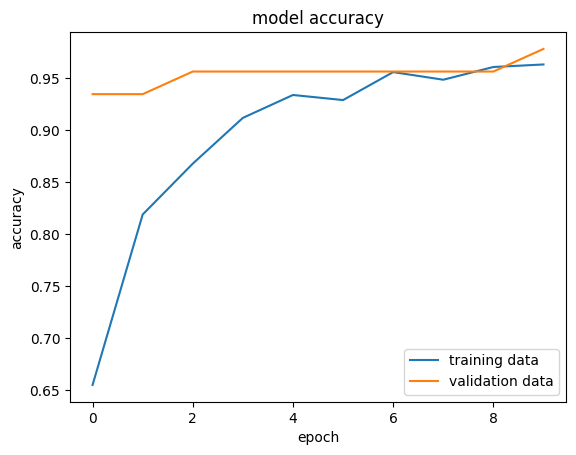

In [48]:
# Plotting accuracy vs epoch

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data','validation data'],loc='lower right')

In [49]:
# Accuracy of model on test data
loss , accuracy = model.evaluate(x_test_std,y_test_encoded)
print(accuracy)

4/4 [==============================] - 0s 4ms/step - loss: 0.7526 - accuracy: 0.9649
0.9649122953414917


Thus accuracy of 97.36% is achieved on test data

In [50]:
print(x_test_std.shape)
print(x_test_std[0])

(114, 31)
[-0.23949961 -0.04462793 -1.41612656 -0.05903514 -0.16234067  2.0202457
 -0.11323672  0.18500609  0.47102419  0.63336386  0.26335737  0.53209124
  2.62763999  0.62351167  0.11405261  1.01246781  0.41126289  0.63848593
  2.88971815 -0.41675911  0.74270853 -0.32983699 -1.67435595 -0.36854552
 -0.38767294  0.32655007 -0.74858917 -0.54689089 -0.18278004 -1.23064515
 -0.6268286 ]


In [51]:
y_pred = model.predict(x_test_std)

4/4 [==============================] - 0s 3ms/step


In [52]:
print(y_pred.shape)
print(y_pred[0])

(114, 2)
[0.66375726 0.41085035]


In [53]:
print(y_pred)

[[6.6375726e-01 4.1085035e-01]
 [5.4173821e-01 4.6987772e-01]
 [9.5565587e-01 4.4715557e-02]
 [3.2042502e-05 9.9969196e-01]
 [5.4471654e-01 4.1558120e-01]
 [2.8300257e-03 9.9187833e-01]
 [7.6063824e-01 2.1478094e-01]
 [9.5412475e-01 4.3800071e-02]
 [8.7107611e-01 1.2295989e-01]
 [9.0666229e-01 9.3768202e-02]
 [4.3417335e-01 4.9738038e-01]
 [8.2534695e-01 1.6951974e-01]
 [8.2055968e-01 1.9484539e-01]
 [7.5197780e-01 2.9191160e-01]
 [9.1173440e-01 7.3280878e-02]
 [5.5249743e-02 9.3908840e-01]
 [9.3255091e-01 6.5315589e-02]
 [9.0839761e-01 1.0533989e-01]
 [8.9004385e-01 9.3413122e-02]
 [9.6908007e-03 9.7874087e-01]
 [5.3482878e-01 3.3963972e-01]
 [9.4505858e-01 5.7155315e-02]
 [9.1511655e-01 7.7073239e-02]
 [9.4526350e-01 5.8912400e-02]
 [8.1834888e-01 1.6502167e-01]
 [3.1567357e-02 9.6152413e-01]
 [8.3074397e-01 1.8017557e-01]
 [6.6623801e-01 3.2934213e-01]
 [4.3371636e-02 9.4899088e-01]
 [3.0550651e-02 9.5915484e-01]
 [8.7721545e-01 1.2502553e-01]
 [8.6844492e-01 1.3400532e-01]
 [9.2208

In [54]:
# converting the prediction probability to class labels

y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]


BUILDING THE PREDICTIVE SYSTEM



In [55]:
# Predicting the cell as 'M' or 'B' using demo input from dataset

input_data = (866083,13.61,24.69,87.76,572.6,0.09258,0.07862,0.05285,0.03085,0.1761,0.0613,0.231,1.005,1.752,19.83,0.004088,0.01174,0.01796,0.00688,0.01323,0.001465,16.89,35.64,113.2,848.7,0.1471,0.2884,0.3796,0.1329,0.347,0.079)
# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] == 0):
  print("Benign Tumour")
else:
  print("Malignant Tumour")

1/1 [==============================] - 0s 31ms/step
[[0.31331858 0.5938851 ]]
[1]
Malignant Tumour


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
